In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('US_adult_income.csv')

In [3]:
df.workclass.replace(' ?',df.workclass.mode()[0],inplace=True)

In [4]:
df.marital_status.replace(' ?',df.marital_status.mode()[0],inplace=True)

In [5]:
df.occupation.replace(' ?',df.occupation.mode()[0],inplace=True)

In [6]:
replace=df.race.unique()[2:]
for to_replace in replace:
    print(to_replace)
    df['race'].replace(to_replace,' Other',inplace=True)

 Asian-Pac-Islander
 Amer-Indian-Eskimo
 Other


In [7]:
df.native_country.replace(' ?',df.native_country.mode()[0],inplace=True)

In [8]:
df.dropna(inplace=True)

In [9]:
from collections import Counter
target = df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=24720, Percentage=75.919%
Class=1, Count=7841, Percentage=24.081%


In [10]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['workclass']= label_encoder.fit_transform(df['workclass'])
df['education']= label_encoder.fit_transform(df['education'])
df['marital_status']= label_encoder.fit_transform(df['marital_status'])
df['occupation']= label_encoder.fit_transform(df['occupation'])
df['relationship']= label_encoder.fit_transform(df['relationship'])
df['race']= label_encoder.fit_transform(df['race'])
df['sex']= label_encoder.fit_transform(df['sex'])
df['native_country']= label_encoder.fit_transform(df['native_country'])

In [11]:
x_features=list(df.columns)
x_features.remove('income_class')
X=df[x_features]

In [12]:
Y=df.income_class

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE (random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (34530, 14)
After OverSampling, the shape of train_y: (34530,) 

After OverSampling, counts of label '1': 17265
After OverSampling, counts of label '0': 17265


In [42]:
from sklearn import ensemble  
from sklearn import metrics  
from sklearn import model_selection 
from sklearn.tree import DecisionTreeClassifier
tuned_parameters = {'max_depth' : [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100],
                   'max_features':['sqrt','auto'],
                   'criterion': ['gini', 'entropy']  }
rnd_grid = model_selection.GridSearchCV(DecisionTreeClassifier(random_state=42, splitter='best'),
tuned_parameters,
cv=10,
scoring='accuracy',n_jobs=-1,verbose=2)

In [45]:
rnd_grid.fit(X_train_res,y_train_res)
print(f"Best score: {rnd_grid.best_score_}")
print("Best parameters set:")
best_parameters = rnd_grid.best_estimator_.get_params()
for param_name in sorted(tuned_parameters.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 10 folds for each of 76 candidates, totalling 760 fits
Best score: 0.8553721401679699
Best parameters set:
	criterion: gini
	max_depth: 20
	max_features: sqrt


In [46]:
# from sklearn.tree import DecisionTreeClassifier
# dtree = DecisionTreeClassifier(criterion = 'gini',max_depth = 20, max_features = 'sqrt',random_state=42, splitter='best')
# dtree.fit(X_train_res, y_train_res)
dtreepred =rnd_grid.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,dtreepred))
print(confusion_matrix(y_test,dtreepred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      7455
           1       0.58      0.69      0.63      2314

    accuracy                           0.81      9769
   macro avg       0.74      0.77      0.75      9769
weighted avg       0.82      0.81      0.81      9769

[[6277 1178]
 [ 708 1606]]


In [48]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

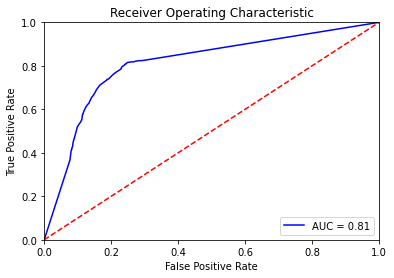

In [49]:
probs = rnd_grid.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
     
        
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [21]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [22]:
result_table = result_table.append({'classifiers':"DTree",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':roc_auc}, ignore_index=True)

C:\Users\SAURAV\AppData\Local\Temp/ipykernel_15252/41682446.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':"DTree",


In [23]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()
logModel.fit(X_train_res,y_train_res)
predLogReg = logModel.predict(X_test)

In [24]:
print(classification_report(y_test,predLogReg))
print(confusion_matrix(y_test,predLogReg))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78      7455
           1       0.41      0.62      0.49      2314

    accuracy                           0.70      9769
   macro avg       0.63      0.67      0.64      9769
weighted avg       0.75      0.70      0.71      9769

[[5365 2090]
 [ 882 1432]]


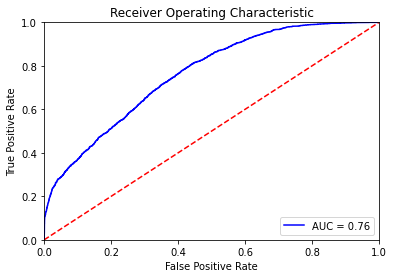

In [25]:
probs = logModel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
     
        
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [26]:
result_table = result_table.append({'classifiers':"LogisticRegression",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':roc_auc}, ignore_index=True)

C:\Users\SAURAV\AppData\Local\Temp/ipykernel_15252/552066436.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':"LogisticRegression",


In [27]:
from sklearn import ensemble  
from sklearn import metrics  
from sklearn import model_selection 
classifier = ensemble.RandomForestClassifier(n_jobs=-1) 

In [28]:
param_grid = {  
    "n_estimators": [100, 200, 250, 300, 400, 500],  
    "max_depth": [1, 2, 5, 7, 11, 15],  
    "criterion": ["gini", "entropy"]  }  

In [29]:
model = model_selection.GridSearchCV( 
    estimator=classifier,  param_grid=param_grid,  scoring="accuracy",  verbose=10,  n_jobs=-1,  cv=5)

In [30]:
# fit the model and extract best score
model.fit(X_train_res, y_train_res)
print(f"Best score: {model.best_score_}")
print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best score: 0.8810020272227049
Best parameters set:
	criterion: gini
	max_depth: 15
	n_estimators: 200


In [36]:
y_pred = model.predict(X_test)

In [37]:
# # importing random forest classifier from assemble module
# from sklearn.ensemble import RandomForestClassifier
# # creating a RF classifier
# clf = RandomForestClassifier(n_estimators = 100)

# # Training the model on the training dataset
# # fit function is used to train the model using the training sets as parameters
# clf.fit(X_train_res, y_train_res)

# # performing predictions on the test dataset
# y_pred = clf.predict(X_test)

# # metrics are used to find accuracy or error
# from sklearn import metrics
# print()

# # using metrics module for accuracy calculation
# print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


In [38]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8479885351622479


In [39]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      7455
           1       0.66      0.73      0.70      2314

    accuracy                           0.85      9769
   macro avg       0.79      0.81      0.80      9769
weighted avg       0.85      0.85      0.85      9769

[[6587  868]
 [ 617 1697]]


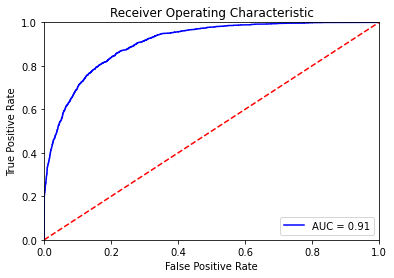

In [41]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
     
        
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
result_table = result_table.append({'classifiers':"RandomForest",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':roc_auc}, ignore_index=True)

C:\Users\SAURAV\AppData\Local\Temp/ipykernel_14376/710439954.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':"RandomForest",


In [33]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=1, probability = True)
classifier.fit(X_train_res, y_train_res)
SVC(random_state=1)
Y_pred_SVM = classifier.predict(X_test)

In [34]:
print(classification_report(y_test,Y_pred_SVM))
print(confusion_matrix(y_test,Y_pred_SVM))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      7455
           1       0.84      0.20      0.32      2314

    accuracy                           0.80      9769
   macro avg       0.82      0.59      0.60      9769
weighted avg       0.81      0.80      0.75      9769

[[7366   89]
 [1850  464]]


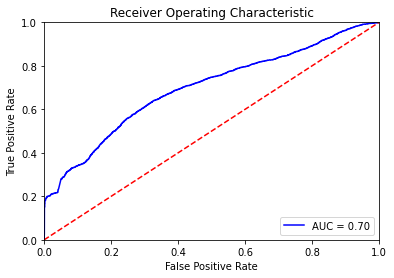

In [35]:
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
result_table = result_table.append({'classifiers':"SVM",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':roc_auc}, ignore_index=True)

C:\Users\SAURAV\AppData\Local\Temp/ipykernel_14376/2074792947.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':"SVM",


In [38]:
#classifiers = [DecisionTreeClassifier(criterion = 'gini',max_depth = 20, max_features = 'sqrt',random_state=42, splitter='best'),LogisticRegression(random_state=1234), 
  #             RandomForestClassifier(n_estimators = 100),SVC(kernel='rbf',random_state=1, probability = True)]

In [39]:
#result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [56]:
#for cls in classifiers:
 #   model = cls.fit(X_train_res, y_train_res)
  #  yproba = model.predict_proba(X_test)[::,1]
    
   # fpr, tpr, _ = roc_curve(y_test,  yproba)
   # auc = roc_auc_score(y_test, yproba)
    
   # result_table = result_table.append({'classifiers':cls.__class__.__name__,
    #                                    'fpr':fpr, 
     #                                   'tpr':tpr, 
      #                                  'auc':auc}, ignore_index=True)

C:\Users\SAURAV\AppData\Local\Temp/ipykernel_20016/663850813.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
C:\Users\SAURAV\AppData\Local\Temp/ipykernel_20016/663850813.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
C:\Users\SAURAV\AppData\Local\Temp/ipykernel_20016/663850813.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
C:\Users\SAURAV\AppData\Local\Temp/ipykernel_20016/663850813.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

In [41]:
result_table

,classifiers,fpr,tpr,auc
0,DTree,"[0.0, 0.07538564721663313, 0.0755197853789403,...","[0.0, 0.3599827139152982, 0.36084701815038894,...",0.809986
1,LogisticRegression,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.000432152117545376, 0.0017286084701815...",0.762492
2,RandomForest,"[0.0, 0.0, 0.00040241448692152917, 0.000670690...","[0.0, 0.05445116681071737, 0.09334485738980121...",0.89439
3,SVM,"[0.0, 0.0, 0.0002682763246143528, 0.0002682763...","[0.0, 0.024200518582541054, 0.0242005185825410...",0.696804


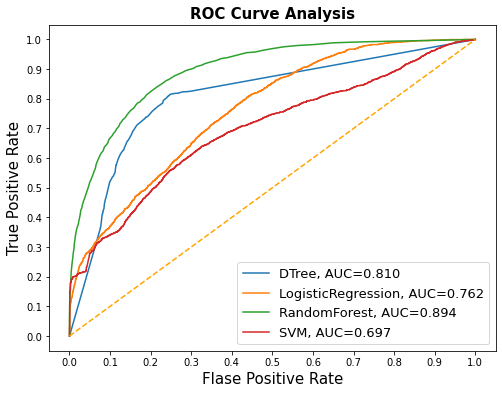

In [42]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(result_table.loc[i]['classifiers'], result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')